## 5	EL VALOR DEL DINERO EN EL TIEMPO

## 5.1	Introducción al valor temporal del dinero, valor futuro y valor presente

In [1]:
import numpy_financial as npf  #Se importa la librería

npf.fv(0.1,2,0,100) 


-121.00000000000001

In [3]:
234/(1+0.0145)**5     

217.74871488824184

In [4]:
npf.pv (0.0145,5,0,234)   

-217.74871488824184

In [5]:
import numpy_financial as npf

help(npf.fv)


Help on function fv in module numpy_financial._financial:

fv(rate, nper, pmt, pv, when='end')
    Compute the future value.
    
    Given:
     * a present value, `pv`
     * an interest `rate` compounded once per period, of which
       there are
     * `nper` total
     * a (fixed) payment, `pmt`, paid either
     * at the beginning (`when` = {'begin', 1}) or the end
       (`when` = {'end', 0}) of each period
    
    Return:
       the value at the end of the `nper` periods
    
    Parameters
    ----------
    rate : scalar or array_like of shape(M, )
        Rate of interest as decimal (not per cent) per period
    nper : scalar or array_like of shape(M, )
        Number of compounding periods
    pmt : scalar or array_like of shape(M, )
        Payment
    pv : scalar or array_like of shape(M, )
        Present value
    when : {{'begin', 1}, {'end', 0}}, {string, int}, optional
        When payments are due ('begin' (1) or 'end' (0)).
        Defaults to {'end', 0}.
    
   

## 5.2	Valor presente de una perpetuidad

In [6]:
3000/0.025   

120000.0

## 5.3	Valor presente de una perpetuidad creciente

In [7]:
3000/(0.025-0.01) 

199999.99999999997

## 5.4	Valor presente y futuro de una anualidad

In [8]:
import numpy as np

import numpy_financial as npf

npf.pv(0.01,10,20,0,1)


-191.32035152017377

In [9]:
import numpy.lib.financial as fin

fin.pv(0.01,10,20,0)*(1+0.01)


C:\Users\crami\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: numpy.pv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.pv instead (https://pypi.org/project/numpy-financial/).
  This is separate from the ipykernel package so we can avoid doing imports until


-191.3203515201738

## 5.5	Cálculo de los pagos de un préstamo y la tabla de amortización en Python

In [10]:
import pandas as pd
import numpy as np
import numpy_financial as npf

car_loan = 10000
interest = 0.07
years = 5
car_payments = npf.pmt(rate = interest, nper = years, pv = -car_loan)
print(car_payments)


2438.9069444137394


In [11]:
# Crear una tabla de 5 filas y 6 columnas llenas de ceros
loan_table = np.zeros((5,6))

# Convertirlo en un DataFrame
loan_table = pd.DataFrame(loan_table)

# Asignamos los nombres de las columnas
loan_table.columns = ["Año", 'Saldo_Inicial', "Pago", "Intereses","Principal", "Saldo_Final"]

print(loan_table)


   Año  Saldo_Inicial  Pago  Intereses  Principal  Saldo_Final
0  0.0            0.0   0.0        0.0        0.0          0.0
1  0.0            0.0   0.0        0.0        0.0          0.0
2  0.0            0.0   0.0        0.0        0.0          0.0
3  0.0            0.0   0.0        0.0        0.0          0.0
4  0.0            0.0   0.0        0.0        0.0          0.0


In [12]:
# La fila 0 y la columna 0 es nuestro año 1.

# use iloc[] para localizarlo
loan_table.iloc[0,0] = 1

# Saldo inicial es el monto del préstamo del automóvil
loan_table.iloc[0,1] = car_loan

# Los pagos del automóvil son los mismos que calculamos anteriormente.
loan_table.iloc[0,2] = car_payments

# El pago inicial es el monto del préstamo por los intereses
loan_table.iloc[0,3] = car_loan * interest

# El principal es el pago de la cuota menos los intereses
loan_table.iloc[0,4] = car_payments - (car_loan * interest)

# El saldo final es el saldo inicial menos el principal
loan_table.iloc[0,5] = car_loan - (car_payments - (car_loan * interest))

# Nuestro bucle se ejecutará desde la fila 1 a la 4

for i in range(1,5):

# La primera fila es el año
    loan_table.iloc[i,0] = i + 1
    
    # El saldo inicial es el saldo final de años anteriores
    loan_table.iloc[i,1] = loan_table.iloc[(i-1), 5]
    
    # Los pagos corresponden a la cuota.
    loan_table.iloc[i,2] = car_payments
    
    #El interés anual es el saldo inicial * tasa de interes 

    loan_table.iloc[i,3] = loan_table.iloc[i,1] * interest
    
    # El principal es la cuota menos los intereses
    loan_table.iloc[i,4] = car_payments-(loan_table.iloc[i,1]   * interest)
    
    # El saldo final es el saldo inicial menos el principal
    loan_table.iloc[i,5] = loan_table.iloc[i,1] - (car_payments - (loan_table.iloc[i,1] * interest))

# Queremos redondear todos los valores a 2 posiciones decimales.
loan_table = loan_table.round(2)
    
print(loan_table)


   Año  Saldo_Inicial     Pago  Intereses  Principal  Saldo_Final
0  1.0       10000.00  2438.91     700.00    1738.91      8261.09
1  2.0        8261.09  2438.91     578.28    1860.63      6400.46
2  3.0        6400.46  2438.91     448.03    1990.87      4409.59
3  4.0        4409.59  2438.91     308.67    2130.24      2279.35
4  5.0        2279.35  2438.91     159.55    2279.35         0.00


## 5.6	Definición de VPN y regla de VPN

In [13]:
r=0.112

-100+50/(1+r)+60/(1+r)**2+70/(1+r)**3+100/(1+r)**4+20/(1+r)**5


121.55722687966407

In [14]:
import numpy as np
import numpy_financial as npf
cashflows=[-100,50,60,70,100,20]
npf.npv(0.112, cashflows)


121.55722687966407

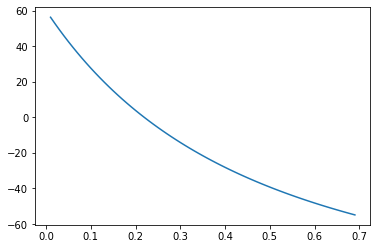

In [15]:
import numpy as np
import numpy_financial as npf
from matplotlib.pyplot import *

cashflows=[-120,50,60,70]
rate=[]
npv =[]

for i in range(1,70):
    rate.append(0.01*i)
    npv.append(npf.npv(0.01*i,cashflows))
plot(rate,npv)
show()


In [16]:
import numpy_financial as npf
cashflows=[-100,50,60,70]
rate=0.1
npv=npf.npv(rate,cashflows)
round(npv,2)


47.63

## 5.7	Definición de TIR y regla de la TIR

In [17]:
import numpy_financial as npf

cashflows=[-100,30,40,40,50]
npf.irr(cashflows)


0.2001879105140867

In [18]:
r=npf.irr(cashflows)

npf.npv(r,cashflows)


1.7763568394002505e-14

In [19]:
import numpy_financial as npf

cashflows=[-100,-50,50,70,100,90,20] 
npf.irr(cashflows) 


0.25949919326073245

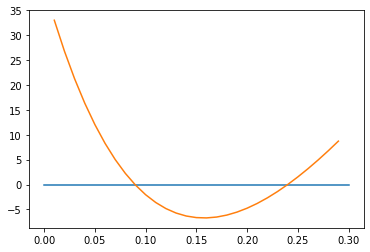

In [20]:
import matplotlib.pyplot as plt
cashflows=[504,-432,-432,-432,832]
rate=[]
npv=[]
x=[0,0.3]
y=[0,0]
for i in range(1,30): 
    rate.append(0.01*i)
    npv.append(npf.npv(0.01*i,cashflows))
    
plt.plot(x,y),plt.plot(rate,npv)
plt.show()
